In [ ]:
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# --- Configuration ---
# Folder where your CSVs are located. Adjust this if your folder structure is different.
FOLDER_PATH = "../../Data/POSIX_results"

# Define the specific POSIX columns we are interested in and how to display them
POSIX_SCORE_COLUMNS_MAP = {
    "posix_all": "Global (All)",
    "posix_all_but_noise": "Global (No Noise)",
    "posix_noise_injection": "Noise Injection",
    "posix_paraphrase": "Paraphrase",
    "posix_spelling_error": "Spelling Error",
    "posix_template_shift": "Template Shift",
}

# --- Data Loading and Aggregation ---

print(f"Loading data from: {FOLDER_PATH}")

all_posix_data_rows = []

# Get all CSV files in the specified folder
# Includes both _ft (finetuned) and non-_ft files
csv_files = glob.glob(os.path.join(FOLDER_PATH, "posix_*_merged.csv"))

for file_path in csv_files:
    df = pd.read_csv(file_path)

    # Extract technique and model from filename
    filename = os.path.basename(file_path)
    match = re.match(r"posix_(\w+)(_ft)?_([\w\-\.]+)_merged\.csv", filename)
    if not match:
        print(f"Skipping file due to unmatched filename pattern: {filename}")
        continue

    technique_raw = match.group(1)
    is_finetuned = match.group(2) is not None
    model_raw = match.group(3)

    # Clean names for better readability
    technique = technique_raw.replace("_", " ").title()
    # Handle specific model name adjustments
    model_name = model_raw.replace("-", " ").replace("hf", "").replace("_", " ").strip()

    # Special handling for Llama and Mistral to match your initial model list
    if "Llama-2-7b" in model_raw:
        model_display_name = "Llama 2 7B"
    elif "Mistral-7B-Instruct-v0.2" in model_raw or "Mistral-7B-v0.1" in model_raw:
        model_display_name = "Mistral 7B Instruct v0.2" # Assuming you fine-tuned v0.2
    elif "falcon-7b-instruct" in model_raw:
        model_display_name = "Falcon 7B Instruct"
    elif "falcon-1b-instruct" in model_raw:
        model_display_name = "Falcon 1B Instruct"
    else:
        model_display_name = model_name # Default if not specifically mapped

    if is_finetuned:
        model_display_name += " (Finetuned)"
    # else: If you have non-finetuned versions in the mix, you might add "(Base)" here

    # Prepare a dictionary for the current row's aggregated data
    current_row_data = {
        "Model": model_display_name,
        "Technique": technique
    }

    # Calculate average for each POSIX score type
    for col_name, display_name in POSIX_SCORE_COLUMNS_MAP.items():
        if col_name in df.columns:
            # Calculate the mean of the column, dropping NaN values
            average_score = df[col_name].dropna().mean()
            current_row_data[display_name] = average_score
        else:
            current_row_data[display_name] = None # Or np.nan for missing data

    all_posix_data_rows.append(current_row_data)

# Create the final DataFrame
posix_summary_df = pd.DataFrame(all_posix_data_rows)



Loading data from: ../../Data/POSIX_results


In [3]:
# Create the final DataFrame
posix_summary_df = pd.DataFrame(all_posix_data_rows)

if not posix_summary_df.empty:
    # Sort for better readability
    posix_summary_df = posix_summary_df.sort_values(by=["Model", "Technique"]).reset_index(drop=True)

    # Reorder columns: Model, Technique, then sorted perturbations
    existing_perturbation_cols = [col for col in POSIX_SCORE_COLUMNS_MAP.values() if col in posix_summary_df.columns]
    final_columns_order = ["Model", "Technique"] + sorted(existing_perturbation_cols)
    posix_summary_df = posix_summary_df[final_columns_order]

In [4]:
print("\n--- Aggregated POSIX Scores Table ---")
# Display the table. `to_markdown()` is good for Jupyter if you want a clean copy-paste.
# Or just `print(posix_summary_df.to_string(index=False))` for console-like output.
display(posix_summary_df)




--- Aggregated POSIX Scores Table ---


,Model,Technique,Global (All),Global (No Noise),Noise Injection,Paraphrase,Spelling Error,Template Shift
0,Falcon 7B Instruct,Chain Of Thought Ft Tiiuae,6.339043,6.845462,7.292658,7.244515,6.746196,6.545674
1,Falcon 7B Instruct,Chain Of Thought Tiiuae,3.954588,3.650644,3.191724,3.687471,3.836171,3.414386
2,Falcon 7B Instruct,Iterative Refinement Ft Tiiuae,6.353867,6.958392,6.278973,7.723815,6.422073,6.729289
3,Falcon 7B Instruct,Iterative Refinement Tiiuae,4.424846,3.984909,3.393284,4.086446,4.068365,3.810969
4,Falcon 7B Instruct,None Ft Tiiuae,4.771552,4.609749,3.144516,5.733564,4.624558,3.471126
5,Falcon 7B Instruct,None Tiiuae,4.468484,3.853309,3.268143,3.905699,3.969201,3.663649
6,Falcon 7B Instruct,Self Consistency Ft Tiiuae,3.576986,4.105291,4.741055,4.268999,4.005205,4.041668
7,Falcon 7B Instruct,Self Consistency Tiiuae,2.759008,2.784929,2.970536,2.827476,2.889965,2.636281
8,Falcon 7B Instruct,Self Refinement Ft Tiiuae,9.543233,7.600923,9.902433,8.399350,6.596624,10.603146
9,Falcon 7B Instruct,Self Refinement Tiiuae,4.258482,5.239609,4.285102,5.548011,4.676877,5.515360


Loading data for plotting from: ../../Data/POSIX_results


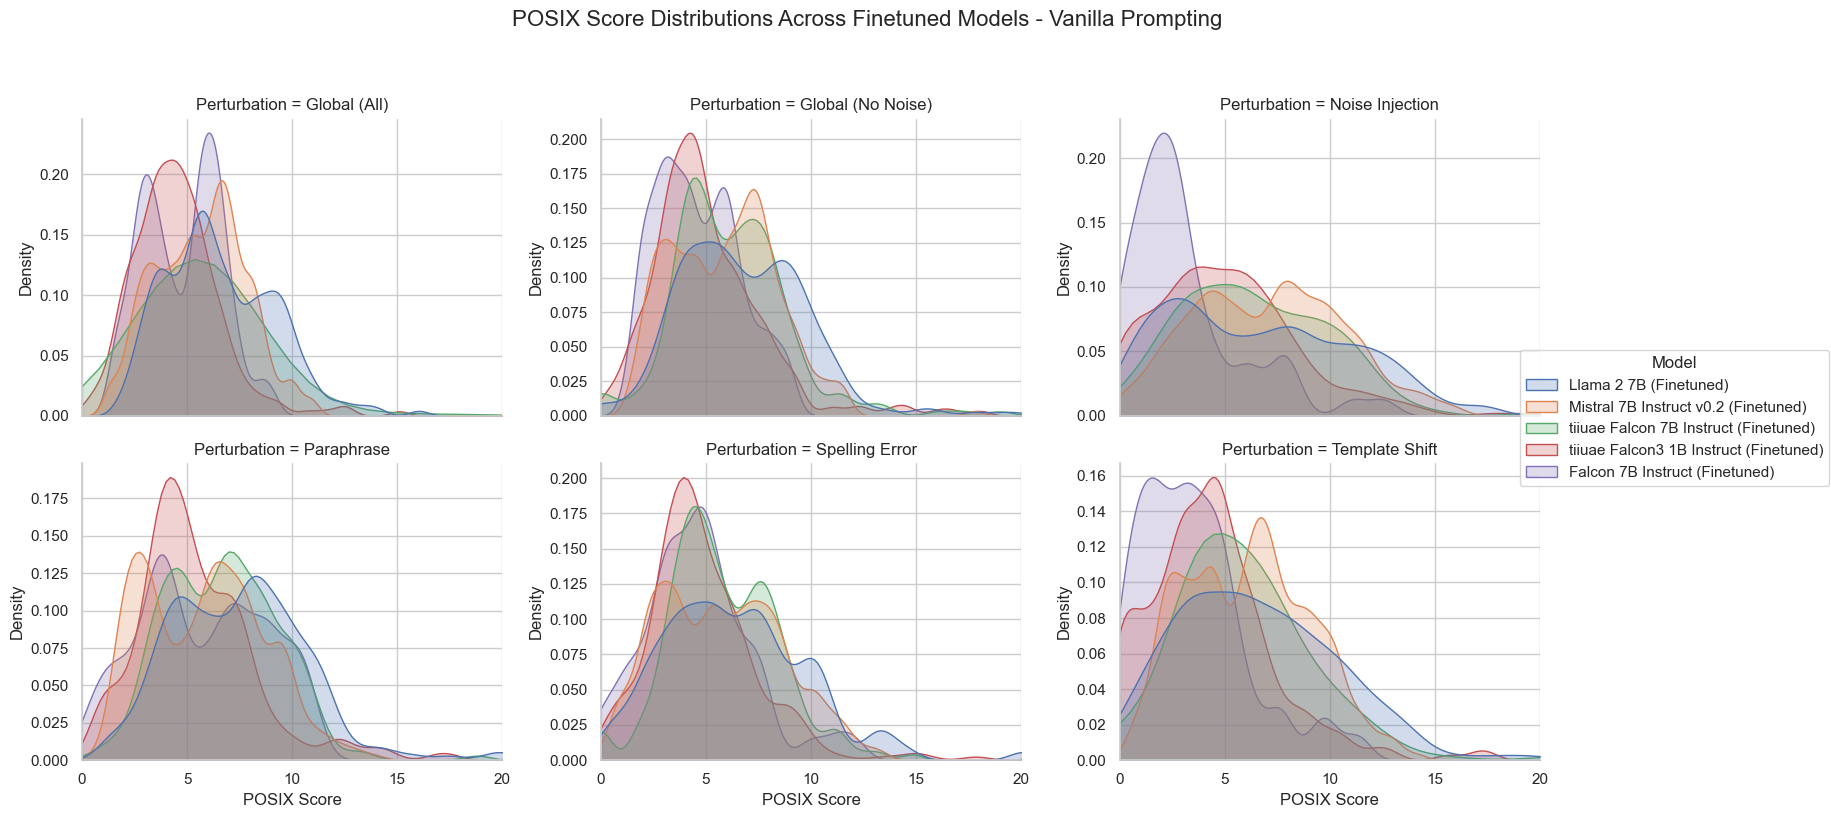

In [ ]:


sns.set_theme(style="whitegrid")

# --- Configuration (aligned with your second script) ---
# Folder where your CSVs are located. Adjust this if your folder structure is different.
FOLDER_PATH = "../../Data/POSIX_results" # Make sure this path is correct for your environment

# Define the specific POSIX columns we are interested in and how to display them
POSIX_SCORE_COLUMNS_MAP = {
    "posix_all": "Global (All)",
    "posix_all_but_noise": "Global (No Noise)",
    "posix_noise_injection": "Noise Injection",
    "posix_paraphrase": "Paraphrase",
    "posix_spelling_error": "Spelling Error",
    "posix_template_shift": "Template Shift",
}

# --- Data Loading and Aggregation ---

print(f"Loading data for plotting from: {FOLDER_PATH}")

all_data = []

# Get all CSV files in the specified folder that match the finetuned pattern
# We're specifically looking for 'posix_*_ft_*_merged.csv' for the original graph's intent
csv_files = glob.glob(os.path.join(FOLDER_PATH, "posix_*_ft_*_merged.csv"))

for file_path in csv_files:
    filename = os.path.basename(file_path)
    # Updated regex to match the finetuned files more robustly,
    # consistent with the second script's parsing for finetuned models.
    match = re.match(r"posix_(\w+)_ft_([\w\-\.]+)_merged\.csv", filename)

    if not match:
        print(f"Skipping file due to unmatched filename pattern for plotting: {filename}")
        continue
    
    technique_raw = match.group(1) # This is not directly used in the plot, but good to keep consistent
    model_raw = match.group(2)
    
    # Clean model name for display, consistent with the second script
    model_name = model_raw.replace("-", " ").replace("hf", "").replace("_", " ").strip()

    # Special handling for Llama and Mistral to match display names
    if "Llama-2-7b" in model_raw:
        model_display_name = "Llama 2 7B (Finetuned)"
    elif "Mistral-7B-Instruct-v0.2" in model_raw or "Mistral-7B-v0.1" in model_raw:
        model_display_name = "Mistral 7B Instruct v0.2 (Finetuned)"
    elif "falcon-7b-instruct" in model_raw:
        model_display_name = "Falcon 7B Instruct (Finetuned)"
    elif "falcon-1b-instruct" in model_raw:
        model_display_name = "Falcon 1B Instruct (Finetuned)"
    else:
        model_display_name = f"{model_name} (Finetuned)" # Default for finetuned models

    df = pd.read_csv(file_path)
    
    # Iterate through the specific POSIX columns defined in the map
    for col_name, display_name in POSIX_SCORE_COLUMNS_MAP.items():
        if col_name in df.columns:
            temp = pd.DataFrame({
                "POSIX": df[col_name],
                "Perturbation": display_name, # Use the display name from the map
                "Model": model_display_name
            })
            all_data.append(temp)
        else:
            print(f"Warning: Column '{col_name}' not found in {filename}")

# Combine all data
plot_df = pd.concat(all_data, ignore_index=True)

# --- Create the displot ---
g = sns.displot(
    data=plot_df,
    x="POSIX",
    col="Perturbation",
    hue="Model",
    kind="kde",
    fill=True,
    common_norm=False,
    col_wrap=3,
    height=4,
    aspect=1.2,
    facet_kws={'sharey': False} # Added to allow independent Y-axes per perturbation
)

# --- Adjust axes and formatting ---
for ax in g.axes.flat:
    ax.set_xlim(0, 20)
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xlabel("POSIX Score")
    ax.set_ylabel("Density")

# Move legend outside
# Check if a legend exists before trying to modify it
if g._legend:
    g._legend.set_bbox_to_anchor((1.05, 0.5))
    g._legend.set_frame_on(True)
    g._legend.set_title("Model")

# Set main title and layout
g.fig.suptitle("POSIX Score Distributions Across Finetuned Models - Vanilla Prompting", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 0.9, 0.98]) # Adjusted rect to better accommodate the legend
plt.show()